In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/cdta_df.csv') 

In [3]:
df.head(100)

,Unnamed: 0,CDTA_name,borough,PU_total_trip_count,PU_average_passenger_count,PU_average_trip_distance,PU_average_fare,PU_average_congestion_surcharge,PU_average_airport_fee,PU_average_duration (min),...,DO_Thursday,DO_Tuesday,DO_Wednesday,DO_2022-01,DO_2022-02,DO_2022-03,DO_2022-04,DO_2022-05,DO_2022-06,DO_2022-07
0,EWR (Newark Airport),EWR (Newark Airport),EWR,3885,1.763192,0.942201,98.986584,0.023230,0.000644,2.797879,...,8326,5439,6364,3963.0,4733.0,8201.0,9902.0,12394.0,11672.0,3.0
1,QN84,QN84 Jamaica Bay (East) (JIA 84 Approximation),Queens,26,1.269231,13.161538,61.702308,1.153846,0.048077,35.181923,...,52,40,47,40.0,36.0,53.0,54.0,77.0,74.0,NaN
2,BX11,BX11 Pelham Parkway-Morris Park (CD 11 Approxi...,Bronx,3300,1.061515,196.039806,29.180373,0.025682,0.000758,26.715297,...,1419,1484,1341,1420.0,1360.0,1657.0,1611.0,1683.0,1617.0,2.0
3,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),Manhattan,788717,1.438643,8.039429,18.775105,2.298218,0.000810,15.907016,...,114727,94855,102170,106905.0,133924.0,156567.0,153266.0,146721.0,146037.0,65.0
4,SI03,SI03 South Shore (CD 3 Approximation),Staten Island,538,1.026022,12.582026,83.148941,0.004647,0.000000,71.446245,...,144,165,168,120.0,151.0,199.0,224.0,197.0,217.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,BX01,BX01 Melrose-Mott Haven-Port Morris (CD 1 Appr...,Bronx,2291,1.198603,107.263680,20.405460,0.131602,0.000000,22.451454,...,983,974,951,1016.0,1115.0,1151.0,1126.0,1204.0,1102.0,NaN
68,BX09,BX09 Soundview-Parkchester (CD 9 Approximation),Bronx,3722,1.122246,42.851198,29.495768,0.045003,0.001008,27.069890,...,1597,1598,1589,1730.0,1760.0,2011.0,1936.0,2007.0,1973.0,NaN
69,BX28,BX28 Pelham Bay Park (JIA 28 Approximation),Bronx,27,1.296296,7.582963,33.475185,0.277778,0.000000,31.051852,...,22,23,24,18.0,23.0,22.0,31.0,41.0,52.0,NaN
70,BK55,BK55 Prospect Park (JIA 55 Approximation),Brooklyn,728,1.381868,330.680192,25.725343,0.413462,0.000000,23.545673,...,427,376,443,447.0,549.0,540.0,631.0,663.0,650.0,NaN


In [4]:
# It contains 72 rows in total, which represent 59 Community Districts + the following additional areas that are only found in CDTA, not in CD.
# -----------------------------
# Bronx:
# 26 -- Van Cortlandt Park
# 27 -- Bronx Park
# 28 -- Pelham Bay Park
# Brooklyn:
# 55 -- Prospect Park
# 56 -- Brooklyn Gateway National Recreation Area
# Manhattan:
# 64 -- Central Park
# Queens
# 80 -- LaGuardia Airport
# 81 -- Flushing Meadows-Corona Park
# 82 -- Forest Park
# 83 -- JFK International Airport
# 84 -- Queens Gateway National Recreation Area
# Staten Island:
# 95 -- S.I. Gateway National Recreation Area
# EWR (Newark Airport)
# -----------------------------
# Columns and values should be mostly self-explanatory but here's some notes for you:
# total values can be obtained by multiplying the average value by "PU_total_trip_count" or "DO_total_trip_count".
# Columns for date, hour, weekday, and year_month are trip counts.

In [5]:
lcta = df.CDTA_name.unique()

In [6]:
lcta.sort()

In [7]:
lcta

array(['BK01 Williamsburg-Greenpoint (CD 1 Equivalent)',
       'BK02 Downtown Brooklyn-Fort Greene (CD 2 Approximation)',
       'BK03 Bedford-Stuyvesant (CD 3 Approximation)',
       'BK04 Bushwick (CD 4 Equivalent)',
       'BK05 East New York-Cypress Hills (CD 5 Approximation)',
       'BK06 Park Slope-Carroll Gardens (CD 6 Approximation)',
       'BK07 Sunset Park-Windsor Terrace (CD 7 Approximation)',
       'BK08 Crown Heights (North) (CD 8 Approximation)',
       'BK09 Crown Heights (South) (CD 9 Approximation)',
       'BK10 Bay Ridge-Dyker Heights (CD 10 Approximation)',
       'BK11 Bensonhurst-Bath Beach (CD 11 Approximation)',
       'BK12 Borough Park-Kensington (CD 12 Approximation)',
       'BK13 Coney Island-Brighton Beach (CD 13 Approximation)',
       'BK14 Flatbush-Midwood (CD 14 Approximation)',
       'BK15 Sheepshead Bay-Gravesend (East) (CD 15 Approximation)',
       'BK16 Ocean Hill-Brownsville (CD 16 Approximation)',
       'BK17 East Flatbush (CD 17 Approxima

In [8]:
df.shape

(72, 155)

In [9]:
df.columns

Index(['Unnamed: 0', 'CDTA_name', 'borough', 'PU_total_trip_count',
       'PU_average_passenger_count', 'PU_average_trip_distance',
       'PU_average_fare', 'PU_average_congestion_surcharge',
       'PU_average_airport_fee', 'PU_average_duration (min)',
       ...
       'DO_Thursday', 'DO_Tuesday', 'DO_Wednesday', 'DO_2022-01', 'DO_2022-02',
       'DO_2022-03', 'DO_2022-04', 'DO_2022-05', 'DO_2022-06', 'DO_2022-07'],
      dtype='object', length=155)

In [10]:
df_totals = df[['Unnamed: 0','CDTA_name','PU_total_trip_count',
       'PU_average_passenger_count', 'PU_average_trip_distance',
       'PU_average_fare', 'PU_average_congestion_surcharge',
       'PU_average_airport_fee', 'PU_average_duration (min)']]

In [11]:
df_totals.head(20)

,Unnamed: 0,CDTA_name,PU_total_trip_count,PU_average_passenger_count,PU_average_trip_distance,PU_average_fare,PU_average_congestion_surcharge,PU_average_airport_fee,PU_average_duration (min)
0,EWR (Newark Airport),EWR (Newark Airport),3885,1.763192,0.942201,98.986584,0.023230,0.000644,2.797879
1,QN84,QN84 Jamaica Bay (East) (JIA 84 Approximation),26,1.269231,13.161538,61.702308,1.153846,0.048077,35.181923
2,BX11,BX11 Pelham Parkway-Morris Park (CD 11 Approxi...,3300,1.061515,196.039806,29.180373,0.025682,0.000758,26.715297
3,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),788717,1.438643,8.039429,18.775105,2.298218,0.000810,15.907016
4,SI03,SI03 South Shore (CD 3 Approximation),538,1.026022,12.582026,83.148941,0.004647,0.000000,71.446245
5,SI95,SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...,46,1.304348,7.752174,50.386087,0.326087,0.027174,22.957826
6,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),73786,1.238175,57.755383,16.243903,0.519573,0.006353,17.586802
7,QN11,QN11 Auburndale-Bayside-Douglaston (CD 11 Appr...,1098,1.121129,4.242386,36.531047,0.020492,0.003415,27.293816
8,QN12,QN12 Jamaica-St. Albans-Hollis (CD 12 Approxim...,20385,1.250527,24.532607,39.868244,0.619868,0.100687,33.447974
9,BK11,BK11 Bensonhurst-Bath Beach (CD 11 Approximation),1582,1.106827,60.015082,37.283767,0.030183,0.002370,35.394880


In [12]:
df_totals = df_totals.sort_values("PU_total_trip_count", ascending=False)

In [13]:
df_totals_small = df_totals[df_totals['PU_total_trip_count'] < 100000].sort_values("PU_total_trip_count", ascending=False)

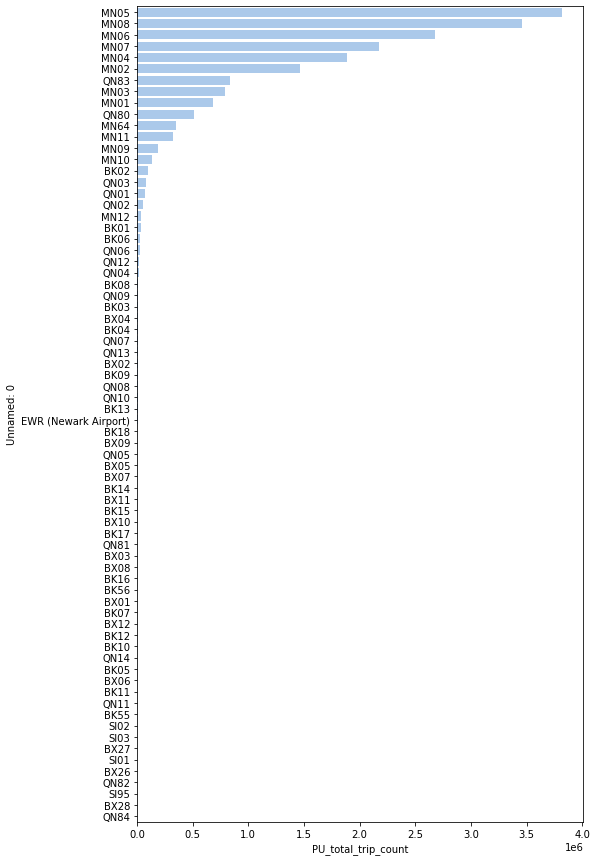

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,15))
sns.set_color_codes("pastel")
ax = sns.barplot(data=df_totals, y="Unnamed: 0", x='PU_total_trip_count',color="b")





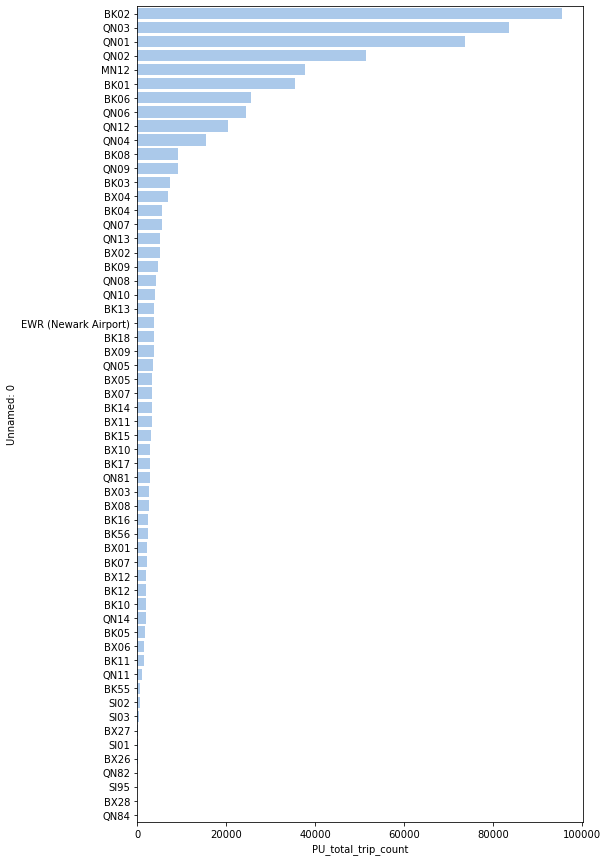

In [32]:
plt.figure(figsize=(8,15))
sns.set_color_codes("pastel")
ax = sns.barplot(data=df_totals_small, y="Unnamed: 0", x='PU_total_trip_count',color="b")


